In [ ]:
the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

In [40]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['Tweet','Category',]
df = pd.read_csv("C:\\Users\\Dell\\New folder\\Desktop\\2Trimester\\Day3\\TweetSent.csv",header=None, names=cols)
# above line will be different depending on where you saved your data, and your file name
df.head()

,Tweet,Category
0,Tweet,Category
1,Not Available,negative
2,IOS 9 App Transport Security. Mm need to check...,neutral
3,"Mar if you have an iOS device, you should down...",neutral
4,@jimmie_vanagon my phone does not run on lates...,negative


In [64]:
df.Category.value_counts()

positive    2888
neutral     2123
negative     956
Category       1
Tweet          1
Name: Category, dtype: int64

In [47]:
df.head(10)

,Tweet,Category
0,Tweet,Category
1,Not Available,negative
2,IOS 9 App Transport Security. Mm need to check...,neutral
3,"Mar if you have an iOS device, you should down...",neutral
4,@jimmie_vanagon my phone does not run on lates...,negative
5,Not sure how to start your publication on iOS?...,positive
6,"Two Dollar Tuesday is here with Forklift 2, Qu...",neutral
7,If you're not already signed up to test my iOS...,neutral
8,"YouTube Gaming Officially Launches On Web, And...",neutral
9,YouTube Gaming Launches Tomorrow with iOS and ...,neutral


# Data Preparation,
# As a way of sanity check, let’s look at the length of the string in text column in each entry.

In [74]:
df['pre_clean_len'] = [len(t) for t in df.Tweet]

# Data Dictionary — first draft
Below is the first draft of the data dictionary for the dataset, but as I go through preparation, this will need to be updated.

In [75]:
from pprint import pprint
data_dict = {
    'Category':{
        'type':df.Category.dtype,
        'description':'Category class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.Tweet.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'Category': {'description': 'Category class - 0:negative, 1:positive',
              'type': dtype('O')},
 'dataset_shape': (5969, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


# I will also plot pre_clean_len with box plot, so that I can see the overall distribution of length of strings in each entry.

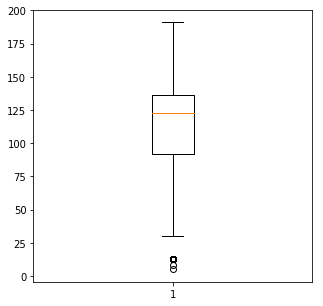

In [76]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [77]:
df[df.pre_clean_len > 140].head(10)

,Tweet,Category,pre_clean_len
11,Parkrun app for iOS downloaded Where have you ...,positive,144
39,@rwang0 zeroes in on the latest in a short vid...,positive,147
66,@flyshorts BTW I &amp; others have run into a ...,neutral,142
80,@KymLang links are working fine on my IOS devi...,positive,144
83,Tech: Android&gt;Star Wars: Uprising launches ...,positive,142
157,"#Apple is expected to unveil 2 iPhones, an App...",positive,143
243,If Apple is upgrading the camera on the iPhone...,positive,144
253,This the 1st year I've not been to excited abo...,positive,142
285,I turn 30 soon &amp; a friend went missing on ...,negative,144
339,If you found a set of headphones &amp; an iPod...,neutral,142


# Defining data cleaning function
With above five data cleaning task, I will first define data cleaning function, and then will be applied to the whole dataset. Tokenization, stemming/lemmatization, stop words will be dealt with later stage when creating matrix with either count vectorizer or Tfidf vectorizer.

In [97]:
df.Tweet[279]

'Get the popcorn (or coffee in my case) ready, folks. 1 hour till the new iPhone event! Tuning in from #Asheville, NC. http://t.co/sTI3xeHGhV'

In [106]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.Tweet[279])


'Get the popcorn (or coffee in my case) ready, folks. 1 hour till the new iPhone event! Tuning in from #Asheville, NC. http://t.co/sTI3xeHGhV'

In [107]:
re.sub('https?://[A-Za-z0-9./]+','',df.Tweet[279])

'Get the popcorn (or coffee in my case) ready, folks. 1 hour till the new iPhone event! Tuning in from #Asheville, NC. '

In [112]:
df.Tweet[175]

"iPad Pro, Apple TV expected to take center stage Wednesday: It's that time of the year. For five years, Apple ... http://t.co/eHpn3KzylM"

In [113]:
re.sub('https?://[A-Za-z0-9./]+','',df.Tweet[175])

"iPad Pro, Apple TV expected to take center stage Wednesday: It's that time of the year. For five years, Apple ... "

In [120]:
df.Tweet[186]

"It was fun to see the excitement on the 6th graders' faces. And some of them seem to be iPad pros already! https://t.co/YnZtTTyg4W"

In [121]:
re.sub('https?://[A-Za-z0-9./]+','',df.Tweet[186])

"It was fun to see the excitement on the 6th graders' faces. And some of them seem to be iPad pros already! "

In [124]:
from bs4 import BeautifulSoup

In [125]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.Tweet[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['tweet',
 'not available',
 'ios app transport security mm need to check if my rd party network pod supports it',
 'mar if you have an ios device you should download our app too',
 'vanagon my phone does not run on latest ios which may account for problem the other day time it was replaced',
 'not sure how to start your publication on ios we ll be live helping with ask me anything sessions today and friday',
 'two dollar tuesday is here with forklift quickkey for ios and suite for pages for just today',
 'if you re not already signed up to test my ios game nows your chance',
 'youtube gaming officially launches on web android ios on august youtube is finally going to r webseries',
 'youtube gaming launches tomorrow with ios and android apps to go head to head with twitch ios game',
 'yashan from bbc the vpn access on ios may be limited during china s military parade any chance to have a chat on that',
 'parkrun app for ios downloaded where have you been before great app easier access 

In [141]:
from past.builtins import xrange

In [172]:
nums = [0,100,500,1000,1500,2000,3000]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in xrange(nums[1],nums[1]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['Tweet'][i]))

Cleaning and parsing the tweets...



In [170]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['Category'])
clean_df['target'] = df.Tweet
clean_df.head()

,Category,target
0,tweet,Tweet
1,not available,Not Available
2,ios app transport security mm need to check if...,IOS 9 App Transport Security. Mm need to check...
3,mar if you have an ios device you should downl...,"Mar if you have an iOS device, you should down..."
4,vanagon my phone does not run on latest ios wh...,@jimmie_vanagon my phone does not run on lates...


In [171]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,Category,target
0,tweet,Tweet
1,not available,Not Available
2,ios app transport security mm need to check if...,IOS 9 App Transport Security. Mm need to check...
3,mar if you have an ios device you should downl...,"Mar if you have an iOS device, you should down..."
4,vanagon my phone does not run on latest ios wh...,@jimmie_vanagon my phone does not run on lates...


# Saving cleaned data as csv

In [173]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,Category,target
0,tweet,Tweet
1,not available,Not Available
2,ios app transport security mm need to check if...,IOS 9 App Transport Security. Mm need to check...
3,mar if you have an ios device you should downl...,"Mar if you have an iOS device, you should down..."
4,vanagon my phone does not run on latest ios wh...,@jimmie_vanagon my phone does not run on lates...
